In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"..\Datasets Italia\Telecommunications - SMS, Call, Internet - MI")

In [3]:
%%time
cdf = pd.DataFrame()
for k,v in enumerate(os.listdir()):
    if 'sms' in v:
        df = pd.read_csv(v,delimiter='\t', header=None, names=['cellId','timeInterval','countryCode','SMSin','SMSout','callIn','callOut', 'internet'])
        df['timeInterval'] = pd.to_datetime(df['timeInterval'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('CET')
        df2 = df.loc[:,['timeInterval','SMSin','SMSout','callIn','callOut','internet']].fillna(0)
        df2 = df2.set_index('timeInterval')
        df3 = df2.resample('10T').sum()
        cdf = cdf.append(df3)
        print(k, v)

1 sms-call-internet-mi-2013-11-01.txt
2 sms-call-internet-mi-2013-11-02.txt
3 sms-call-internet-mi-2013-11-03.txt
4 sms-call-internet-mi-2013-11-04.txt
5 sms-call-internet-mi-2013-11-05.txt
6 sms-call-internet-mi-2013-11-06.txt
7 sms-call-internet-mi-2013-11-07.txt
8 sms-call-internet-mi-2013-11-08.txt
9 sms-call-internet-mi-2013-11-09.txt
10 sms-call-internet-mi-2013-11-10.txt
11 sms-call-internet-mi-2013-11-11.txt
12 sms-call-internet-mi-2013-11-12.txt
13 sms-call-internet-mi-2013-11-13.txt
14 sms-call-internet-mi-2013-11-14.txt
15 sms-call-internet-mi-2013-11-15.txt
16 sms-call-internet-mi-2013-11-16.txt
17 sms-call-internet-mi-2013-11-17.txt
18 sms-call-internet-mi-2013-11-18.txt
19 sms-call-internet-mi-2013-11-19.txt
20 sms-call-internet-mi-2013-11-20.txt
21 sms-call-internet-mi-2013-11-21.txt
22 sms-call-internet-mi-2013-11-22.txt
23 sms-call-internet-mi-2013-11-23.txt
24 sms-call-internet-mi-2013-11-24.txt
25 sms-call-internet-mi-2013-11-25.txt
26 sms-call-internet-mi-2013-11-26

In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8496 entries, 2013-11-01 00:00:00+01:00 to 2013-12-29 23:50:00+01:00
Freq: 10T
Data columns (total 5 columns):
SMSin       8496 non-null float64
SMSout      8496 non-null float64
callIn      8496 non-null float64
callOut     8496 non-null float64
internet    8496 non-null float64
dtypes: float64(5)
memory usage: 398.2 KB


In [5]:
cdf2 = cdf.copy()

In [6]:
cdf2['SMS'] = cdf2['SMSin'] + cdf2['SMSout']
cdf2['call'] = cdf2['callIn'] + cdf2['callOut']

In [7]:
cdf2['day'] = cdf2.index.dayofweek
cdf2['weekend'] = 'Weekday'
cdf2.loc[cdf2['day'].isin([5,6]), 'weekend'] = 'Weekend'

In [8]:
cdfDaily = cdf2.resample('D').sum()
cdfDaily['day'] = cdfDaily.index.dayofweek
cdfDaily['weekend'] = 'Weekday'
cdfDaily.loc[cdf2['day'].isin([5,6]), 'weekend'] = 'Weekend'

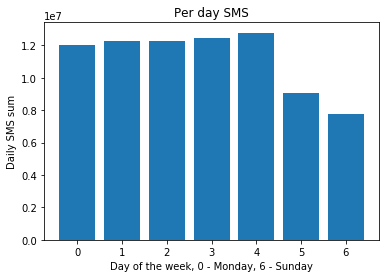

In [9]:
# plt.xlabel("Weekly hour")
# plt.ylabel("Number of connections")
# ax = cdfDaily.plot(x='day', y=['SMS','call'],kind='bar', figsize=(15,10))
plt.bar(cdfDaily['day'],cdfDaily['SMS'])
plt.xlabel('Day of the week, 0 - Monday, 6 - Sunday')
plt.ylabel('Daily SMS sum')
plt.title('Per day SMS')
plt.show()

C:\Users\kisha\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


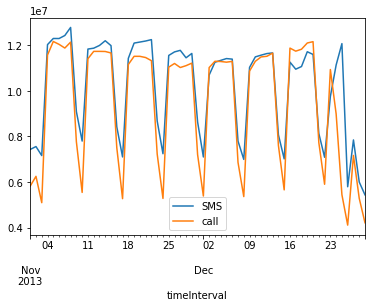

In [10]:
cdfDaily[['SMS','call']].plot()

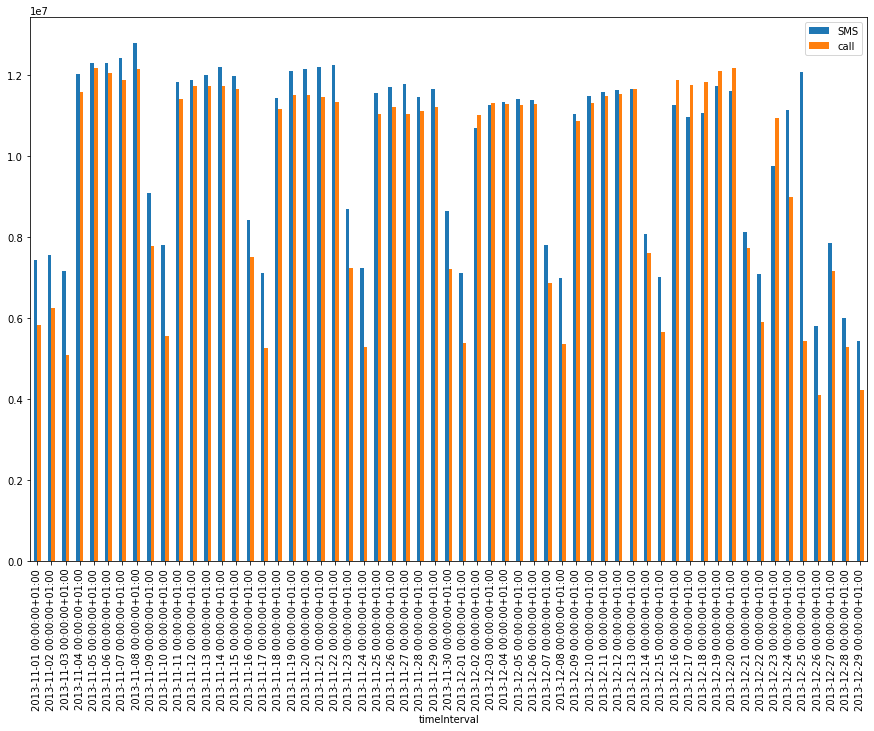

In [11]:
cdfDaily[['SMS','call']].plot.bar(figsize=(15,10))

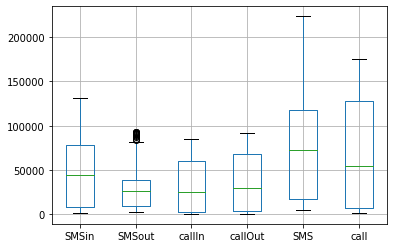

In [12]:
cdf2[['SMSin', 'SMSout', 'callIn', 'callOut', 'SMS', 'call']].boxplot()

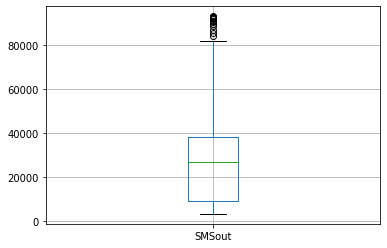

In [13]:
cdf2[['SMSout']].boxplot()

In [15]:
cdf2[cdf2['SMSout']>80000]

,SMSin,SMSout,callIn,callOut,internet,SMS,call,day,weekend
timeInterval,,,,,,,,,
2013-12-25 10:00:00+01:00,109095.691260,81541.521255,33064.584794,44565.327212,420375.213845,190637.212515,77629.912005,2,Weekday
2013-12-25 10:10:00+01:00,112652.370384,85444.442567,36033.355998,46986.148973,424069.419984,198096.812951,83019.504971,2,Weekday
2013-12-25 10:20:00+01:00,115323.368386,86998.394720,39342.906249,51368.537115,439351.793352,202321.763106,90711.443364,2,Weekday
2013-12-25 10:30:00+01:00,120757.229779,92698.851907,41480.087639,52940.293773,451498.868501,213456.081685,94420.381412,2,Weekday
2013-12-25 10:40:00+01:00,126046.346637,91631.867407,44796.916634,57167.682918,456020.658581,217678.214044,101964.599552,2,Weekday
2013-12-25 10:50:00+01:00,128441.374974,92033.391978,48755.418295,61826.300513,464007.956515,220474.766952,110581.718808,2,Weekday
2013-12-25 11:00:00+01:00,130708.369143,93033.443338,50809.852891,63330.631255,480200.251209,223741.812481,114140.484146,2,Weekday
2013-12-25 11:10:00+01:00,131203.782170,90822.875731,53222.880533,66984.351394,487378.873173,222026.657902,120207.231927,2,Weekday
2013-12-25 11:20:00+01:00,130616.847914,92132.085715,54076.894283,67595.662342,500630.232961,222748.933629,121672.556625,2,Weekday


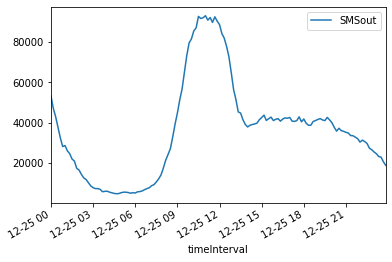

In [17]:
cdf2.loc['2013-12-25',['SMSout']].plot()

C:\Users\kisha\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


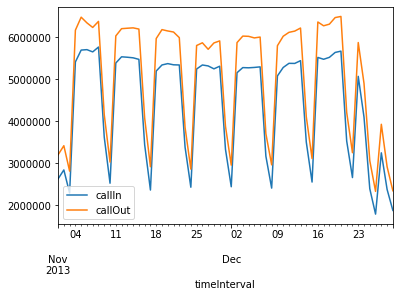

In [18]:
cdf2[['callIn','callOut']].resample('D').sum().plot()

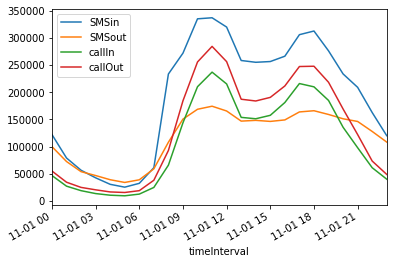

In [19]:
cdf2.loc['2013-11-01',['SMSin','SMSout','callIn','callOut']].resample('H').sum().plot()